In [1]:
import pandas as pd
from sklearn import metrics
from matplotlib import pyplot as plt
from seaborn import heatmap

In [2]:
# dataset path in docker
# actual_ds_path = 'myvolume/subject/data04/truth.txt'
# predicted_ds_path = 'myvolume/subject/data04/predictions.txt'

# dataset path in local
actual_ds_path = '../../subject/data04/truth.txt'
predicted_ds_path = '../../subject/data04/predictions.txt'

actual_df = pd.read_csv(actual_ds_path)
predicted_df = pd.read_csv(predicted_ds_path)

actual_df.shape, predicted_df.shape

((99, 1), (99, 1))

In [3]:
actual_df.columns = ['actual']
actual_df

,actual
0,Jedi
1,Sith
2,Sith
3,Jedi
4,Sith
...,...
94,Sith
95,Sith
96,Sith
97,Jedi


In [4]:
predicted_df.columns = ['predicted']
predicted_df

,predicted
0,Sith
1,Jedi
2,Sith
3,Jedi
4,Jedi
...,...
94,Sith
95,Jedi
96,Jedi
97,Sith


## calculations confusion metrix

In [5]:
import numpy as np

def custom_confusion_matrix(actual, predicted):
    # Step 1: Get all unique categories and sort for consistent order
    categories = np.unique(np.concatenate((actual, predicted)))
    n_classes = len(categories)

    # Step 2: Create a mapping from class label to index
    class_to_index = {label: idx for idx, label in enumerate(categories)}

    # Step 3: Initialize a square matrix of zeros (n_classes x n_classes)
    matrix = np.zeros((n_classes, n_classes), dtype=int)

    # Step 4: Populate the matrix
    for a, p in zip(actual, predicted):
        true_idx = class_to_index[a] # Jedi = 0
        pred_idx = class_to_index[p] # Jedi = 0
        matrix[true_idx, pred_idx] += 1 # tn += 1 ([[tn, fp], [fn, tp]])

    return matrix, categories, class_to_index
cm, cat, cls = custom_confusion_matrix(actual_df['actual'], predicted_df['predicted'])
print(cm)
print(cat)
print(cls)


[[25 23]
 [30 21]]
['Jedi' 'Sith']
{'Jedi': 0, 'Sith': 1}


In [6]:
# cm is a confusion matrix
# tn, fp, fn, tp
cm = metrics.confusion_matrix(actual_df, predicted_df)
cm

array([[25, 23],
       [30, 21]])

In [7]:
print(metrics.classification_report(actual_df, predicted_df))

              precision    recall  f1-score   support

        Jedi       0.45      0.52      0.49        48
        Sith       0.48      0.41      0.44        51

    accuracy                           0.46        99
   macro avg       0.47      0.47      0.46        99
weighted avg       0.47      0.46      0.46        99



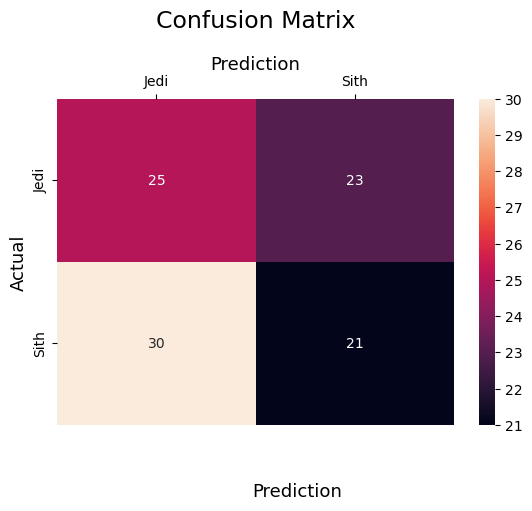

In [8]:
heatmap(
    cm, 
    annot=True,
    fmt='g', 
    xticklabels=['Jedi','Sith'],
    yticklabels=['Jedi','Sith']
)
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()